# TASK #1: Understanding the Problem

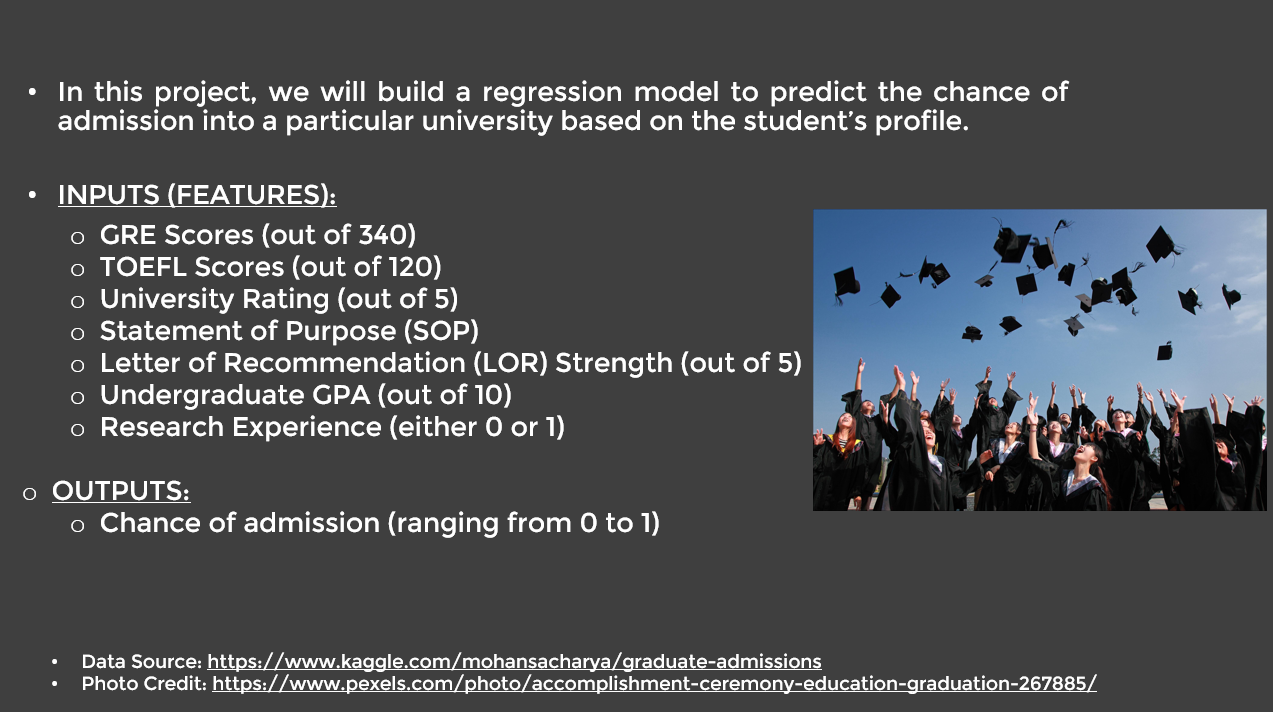

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# read the csv file 
admission_df = pd.read_csv('Admission_Predict.csv')


In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Let's drop the serial no.
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [5]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# TASK #4: PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DF5975FA08>,
      dtype=object)

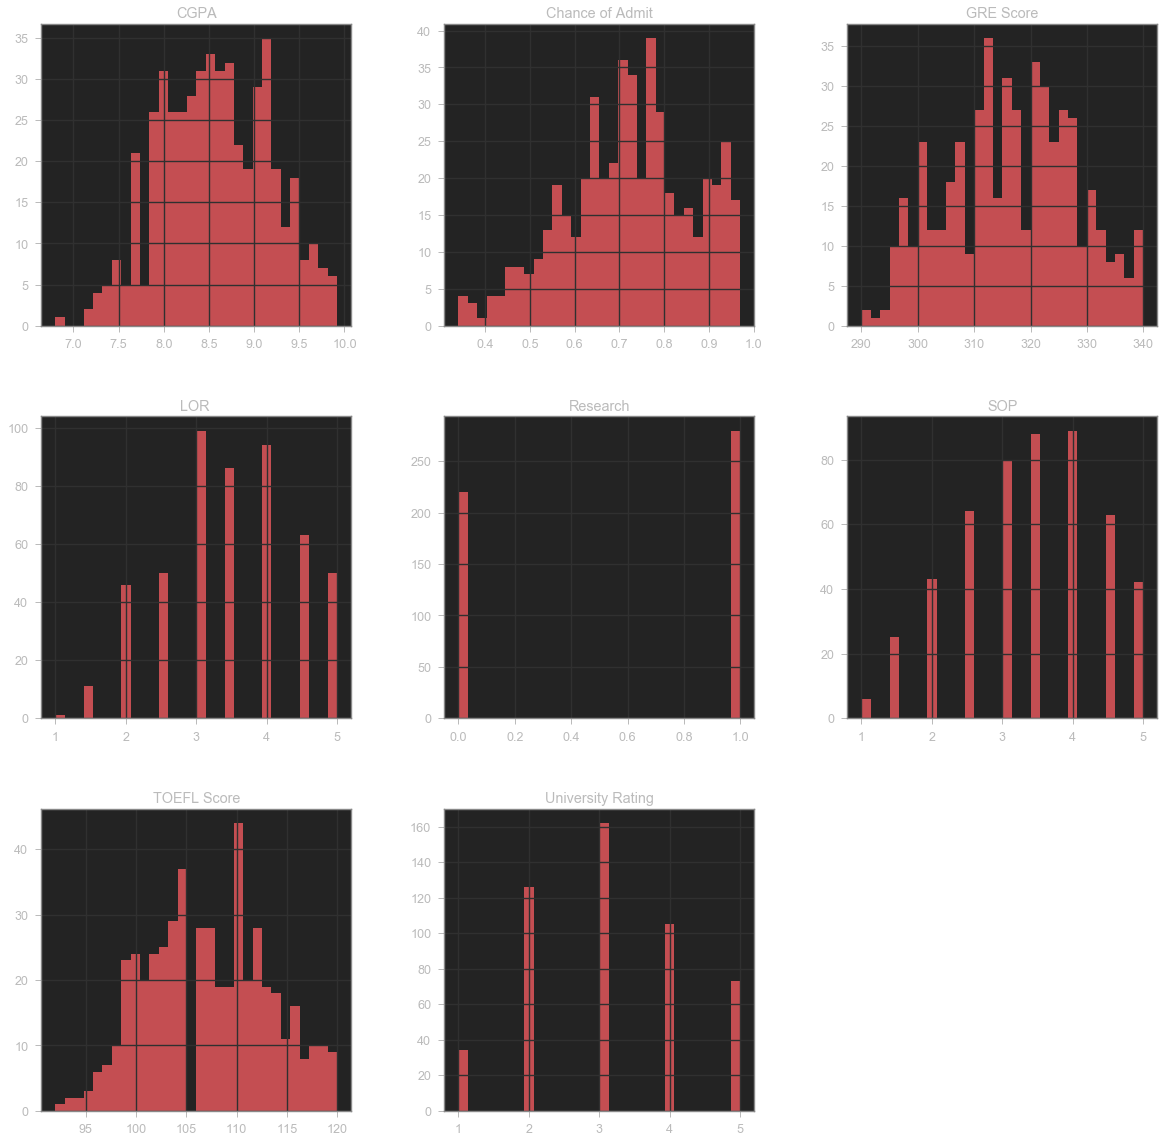

In [9]:
admission_df.hist(bins = 30, figsize = (20, 20), color = 'r')

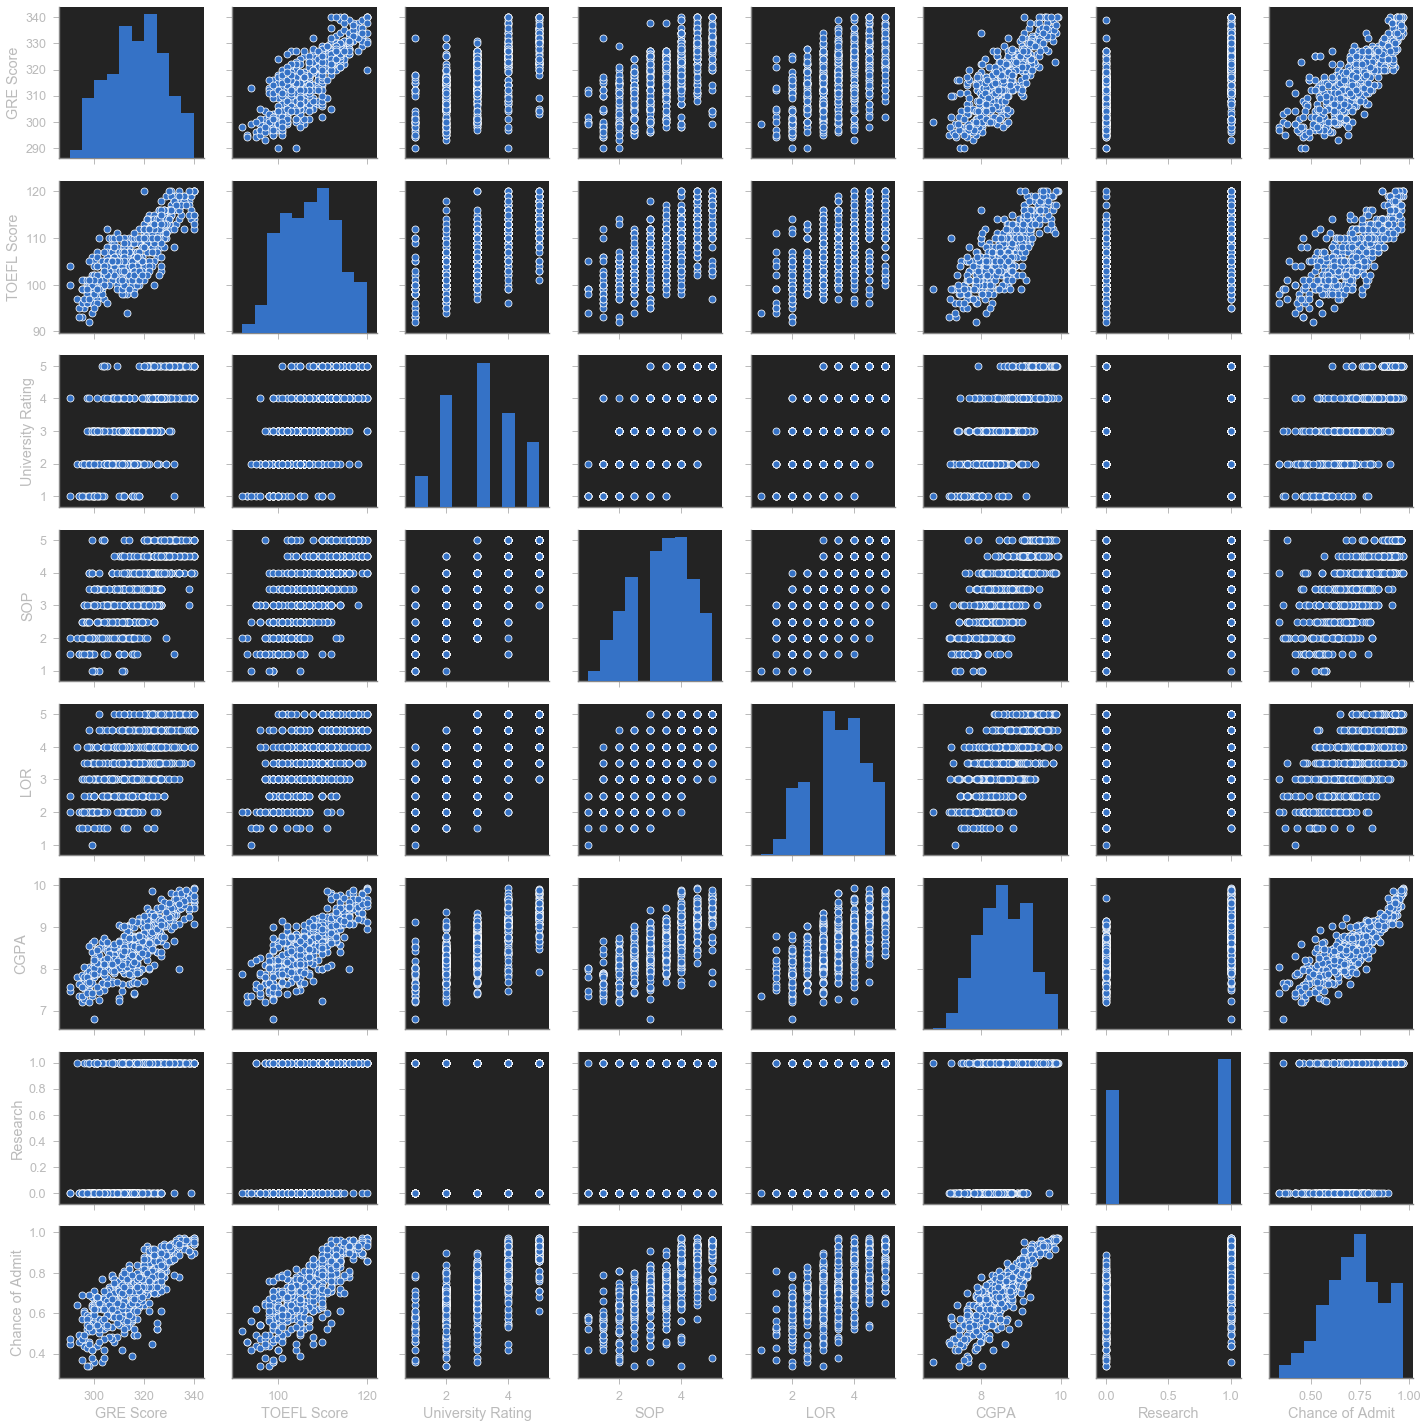

In [10]:
sns.pairplot(admission_df)

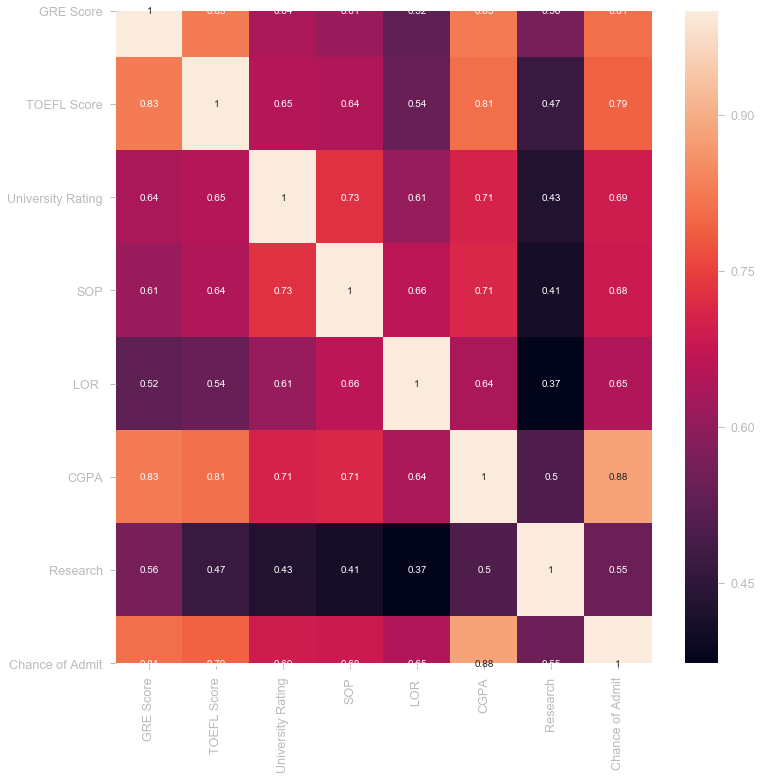

In [11]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix,annot = True)
plt.show()
  

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [12]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
X = admission_df.drop(columns = ['Chance of Admit'])

In [14]:
y = admission_df['Chance of Admit']

In [15]:
X.shape

(500, 7)

In [16]:
y.shape

(500,)

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
y = y.reshape(-1, 1)
y.shape

(500, 1)

In [19]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [20]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [21]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

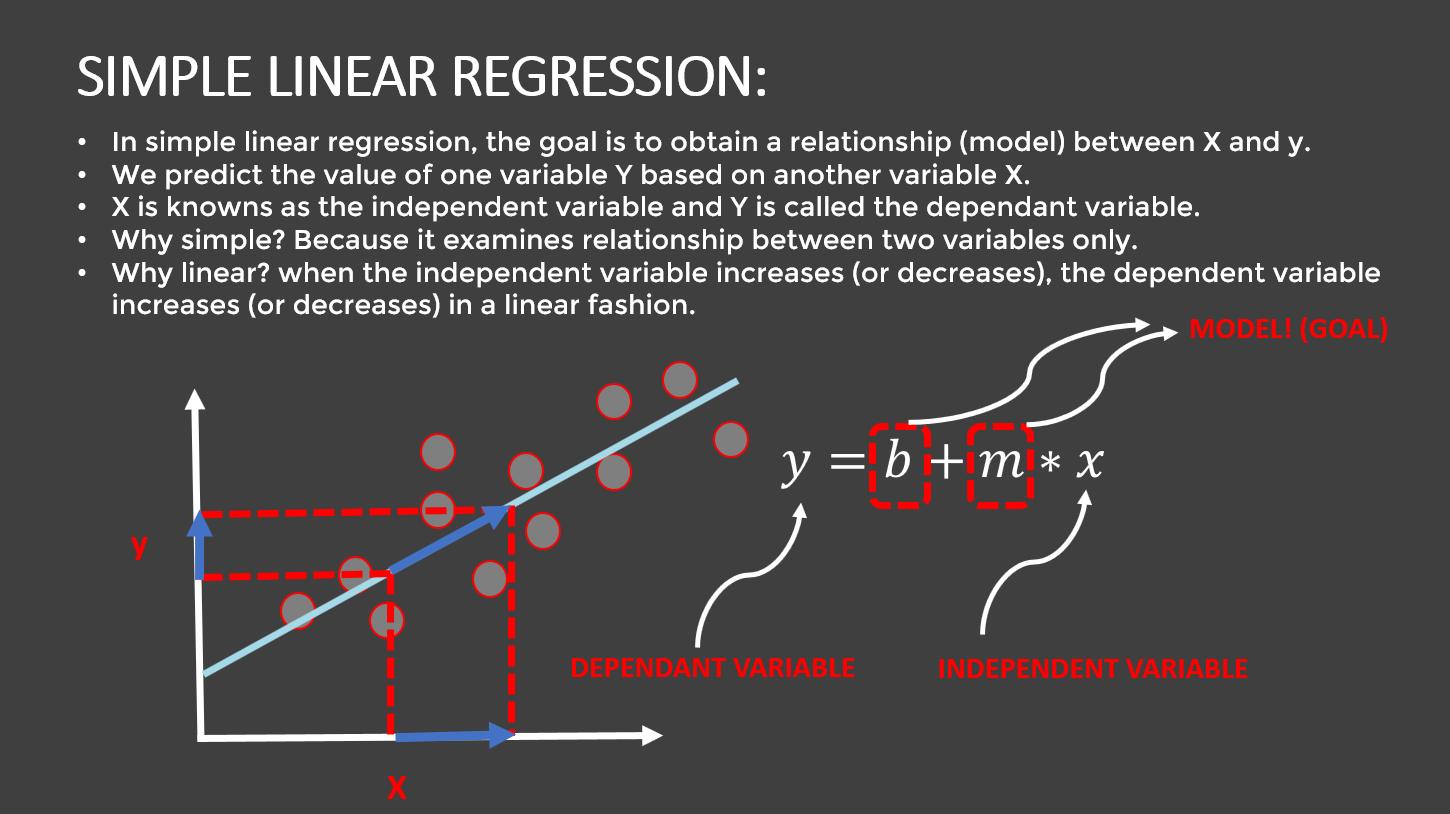

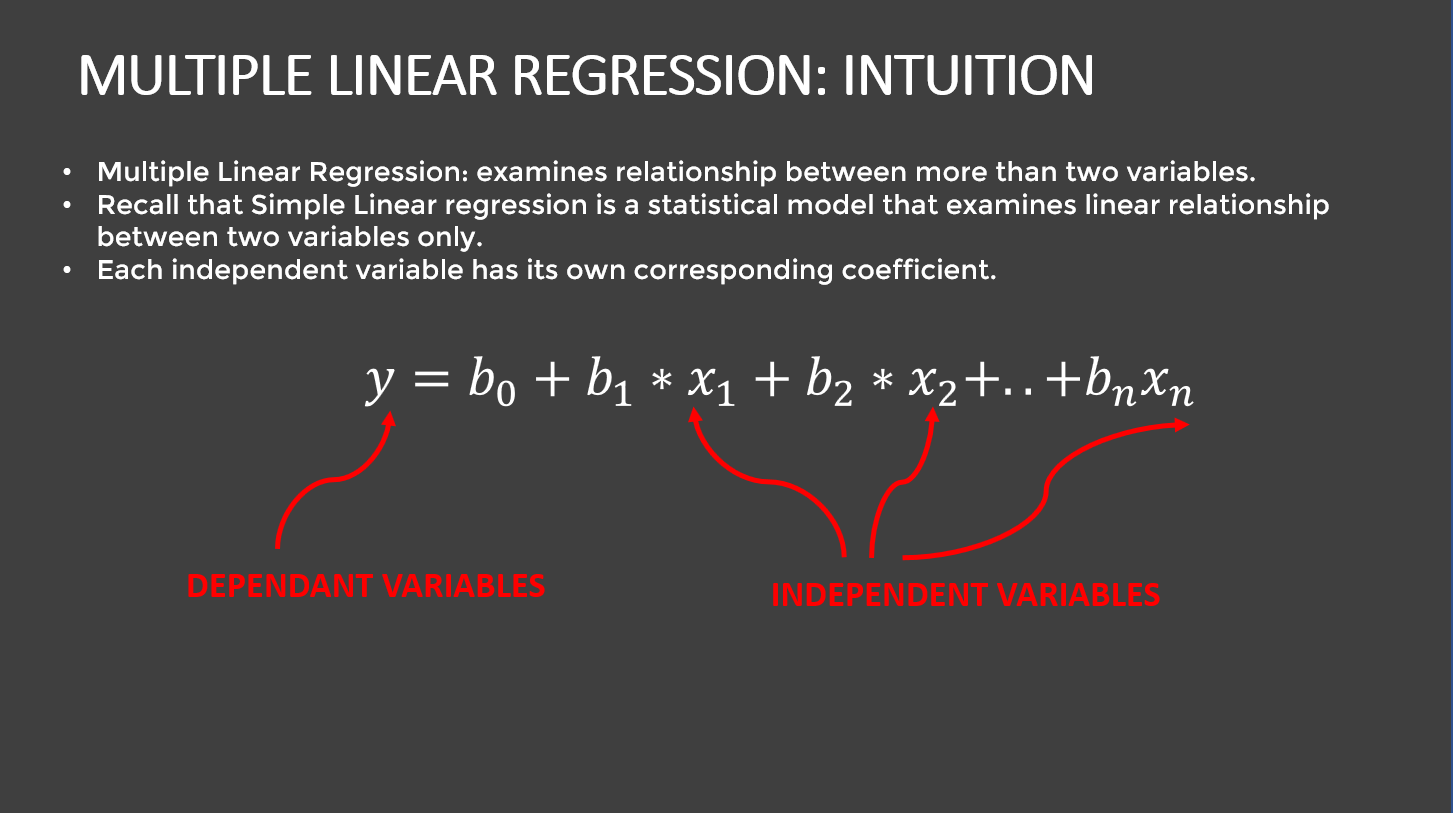

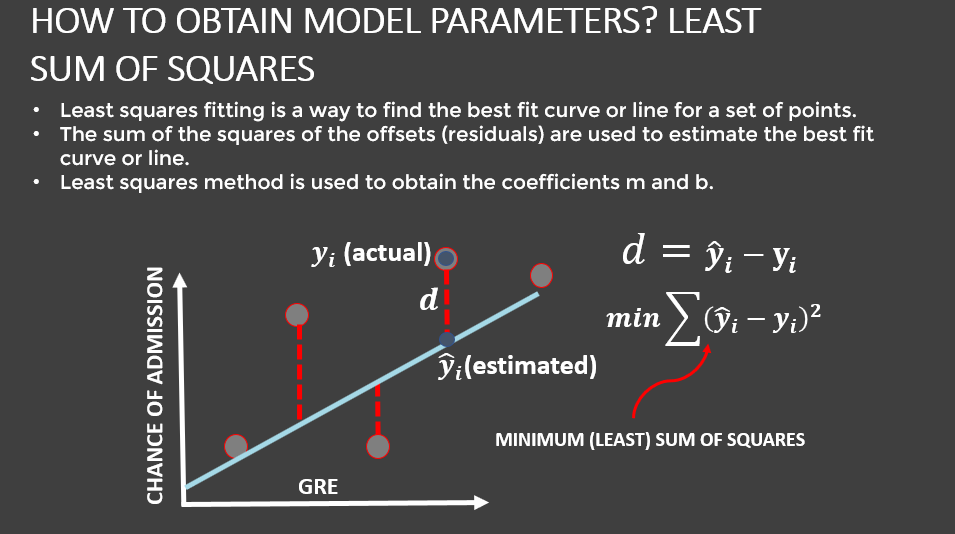

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [23]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [24]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8005356999544704

# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

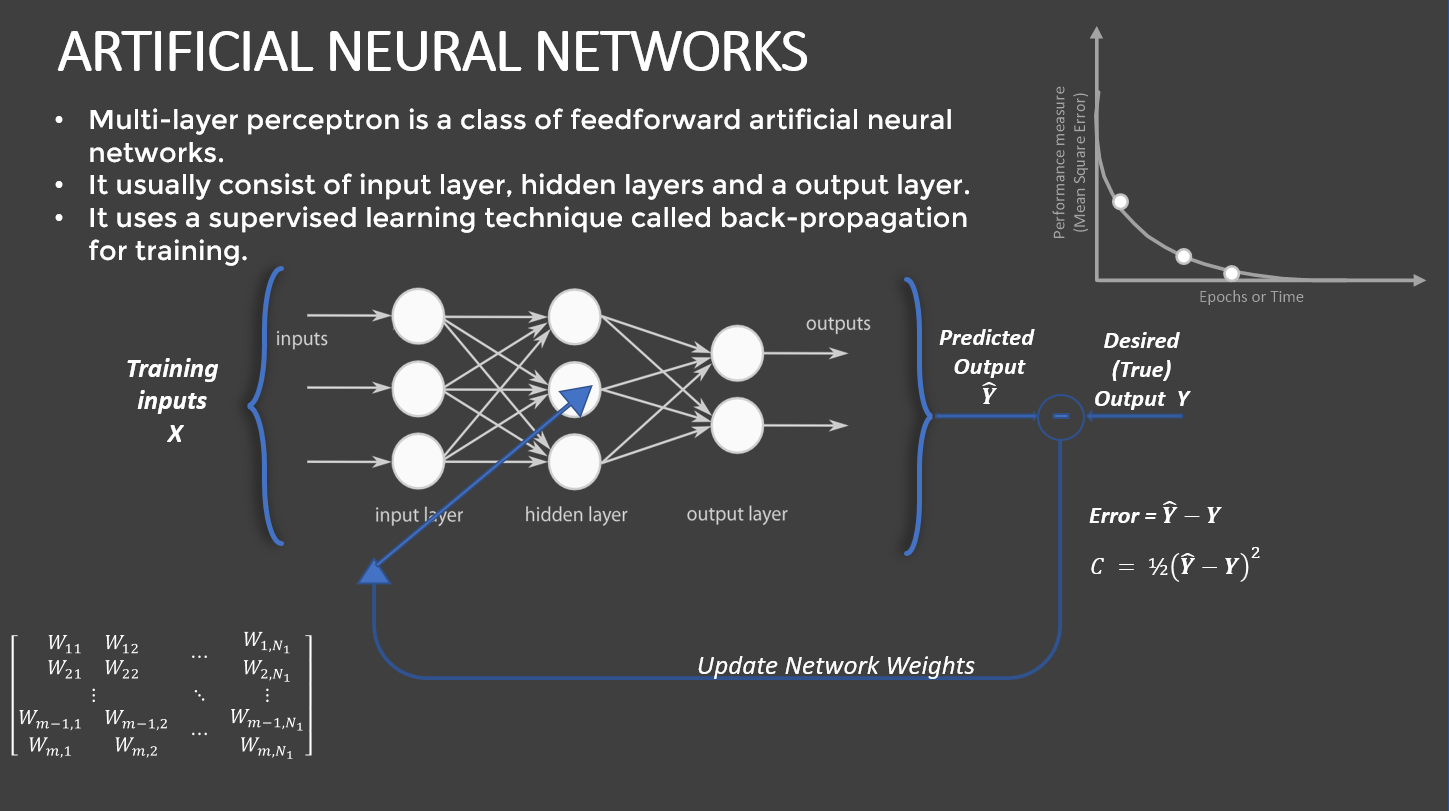

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [26]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [27]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [28]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 0.6208 - val_loss: 0.2389
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3542 - val_loss: 0.2205
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3007 - val_loss: 0.2195
Epoch 4/100
17/17 [==============================] - ETA: 0s - loss: 0.458 - 0s 2ms/step - loss: 0.3037 - val_loss: 0.2124
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2552 - val_loss: 0.2021
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2392 - val_loss: 0.2213
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2391 - val_loss: 0.2032
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2417 - val_loss: 0.2114
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2033 - val_loss: 0.2153
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2344 - va

Epoch 83/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1147 - val_loss: 0.2442
Epoch 84/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1163 - val_loss: 0.2289
Epoch 85/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1266 - val_loss: 0.2453
Epoch 86/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1198 - val_loss: 0.2314
Epoch 87/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1046 - val_loss: 0.2243
Epoch 88/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1213 - val_loss: 0.2543
Epoch 89/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - val_loss: 0.2435
Epoch 90/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1096 - val_loss: 0.2354
Epoch 91/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - val_loss: 0.2355
Epoch 92/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1000 - val_loss: 0.2306


In [29]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 997us/step - loss: 0.3161
Accuracy : 0.683908998966217


In [30]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

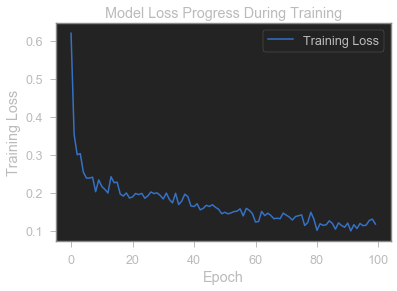

In [31]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [32]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [33]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.5754159287033198

In [34]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [35]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [36]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.7733205406602103

# TASK #9: UNDERSTAND VARIOUS REGRESSION KPIs

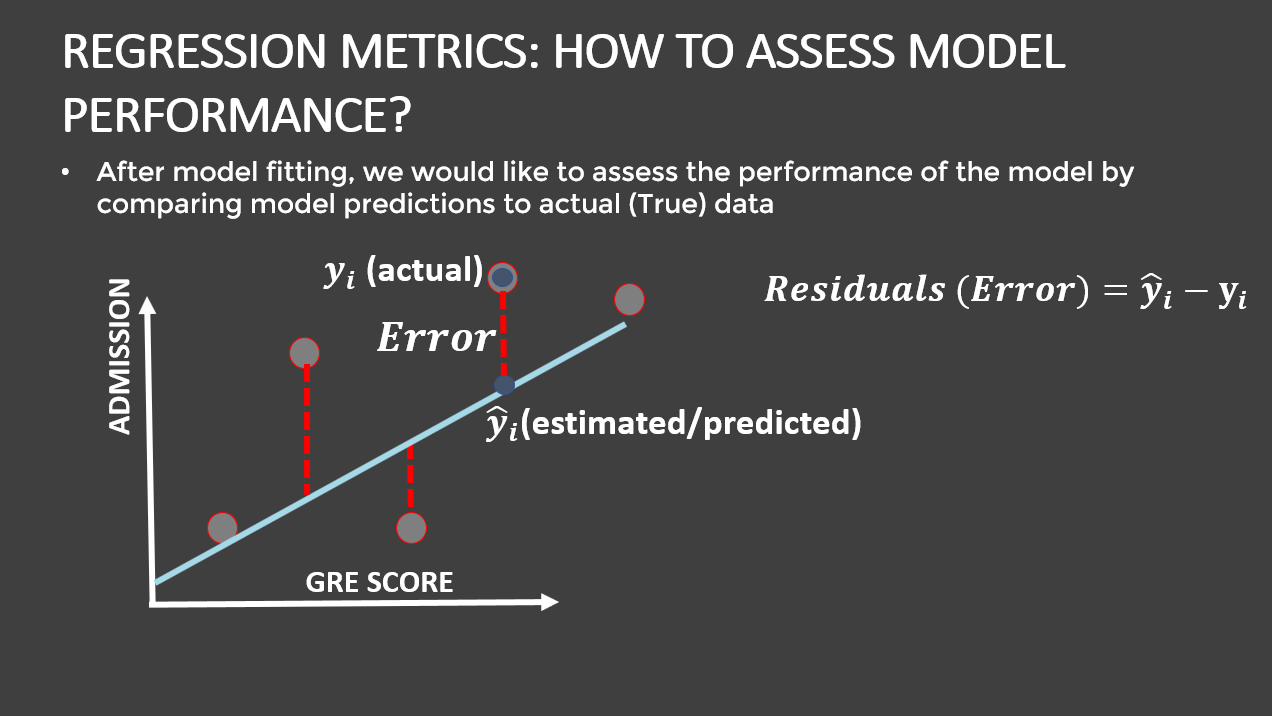

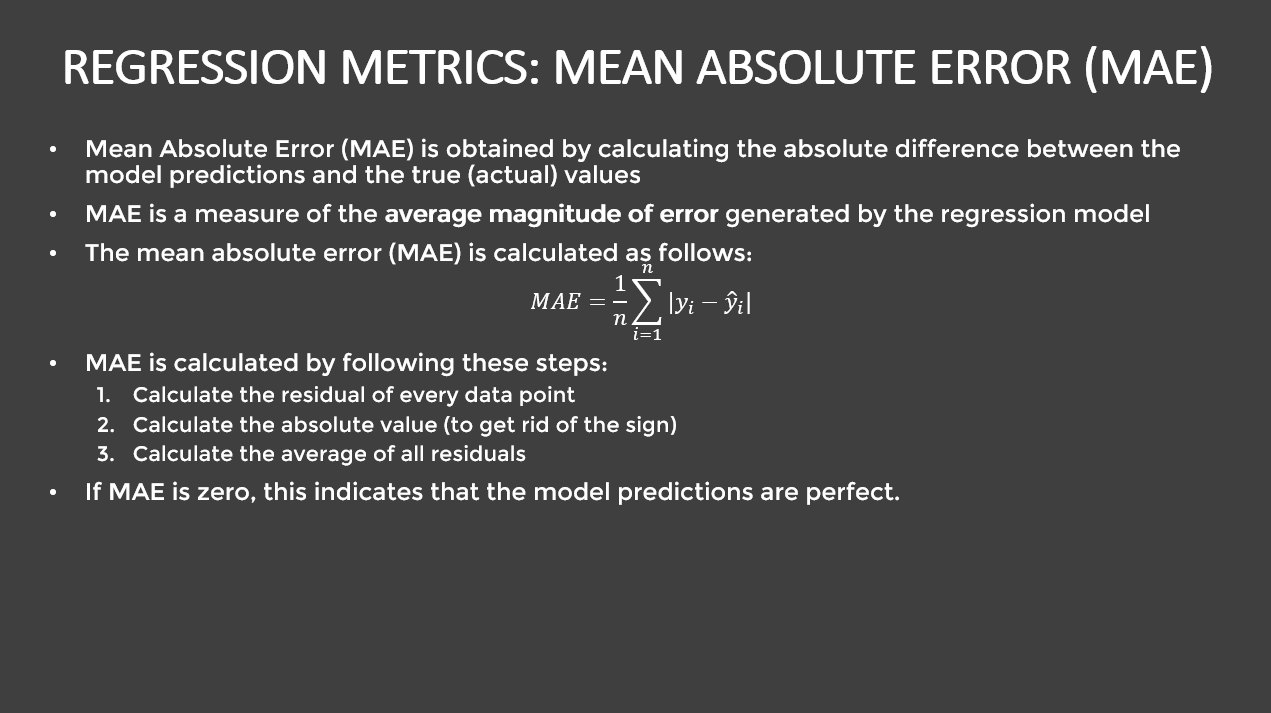

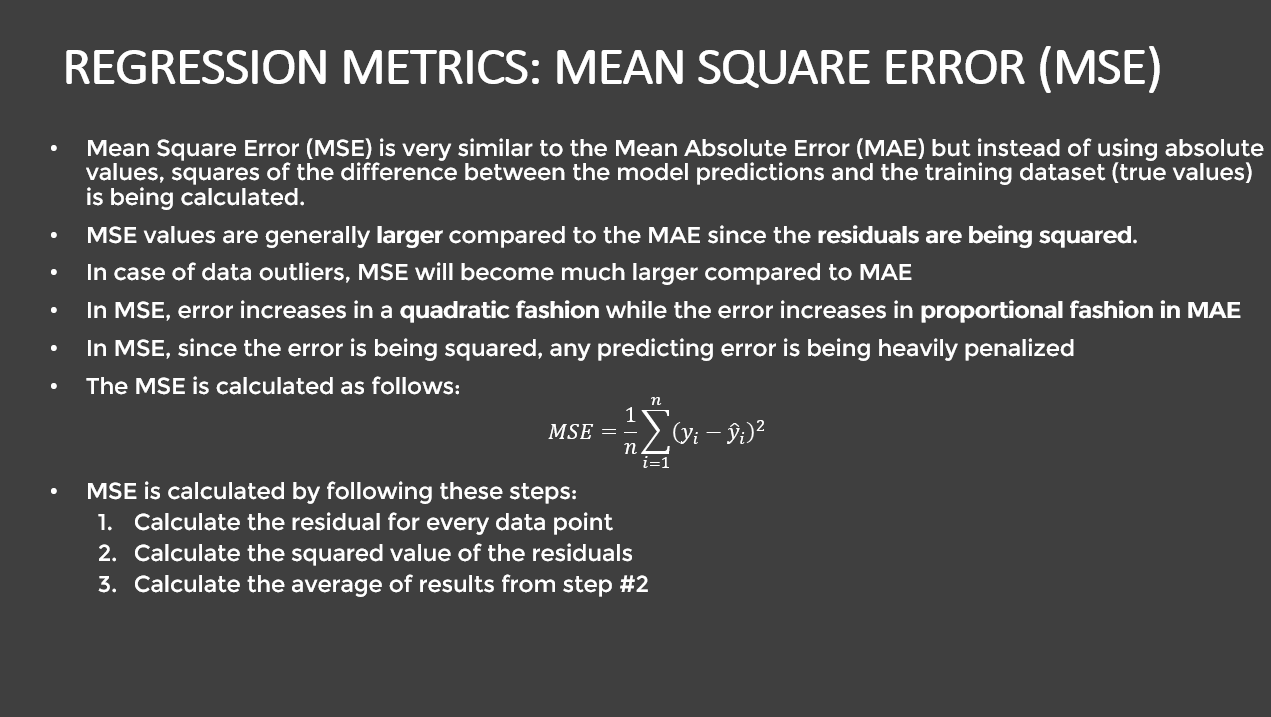

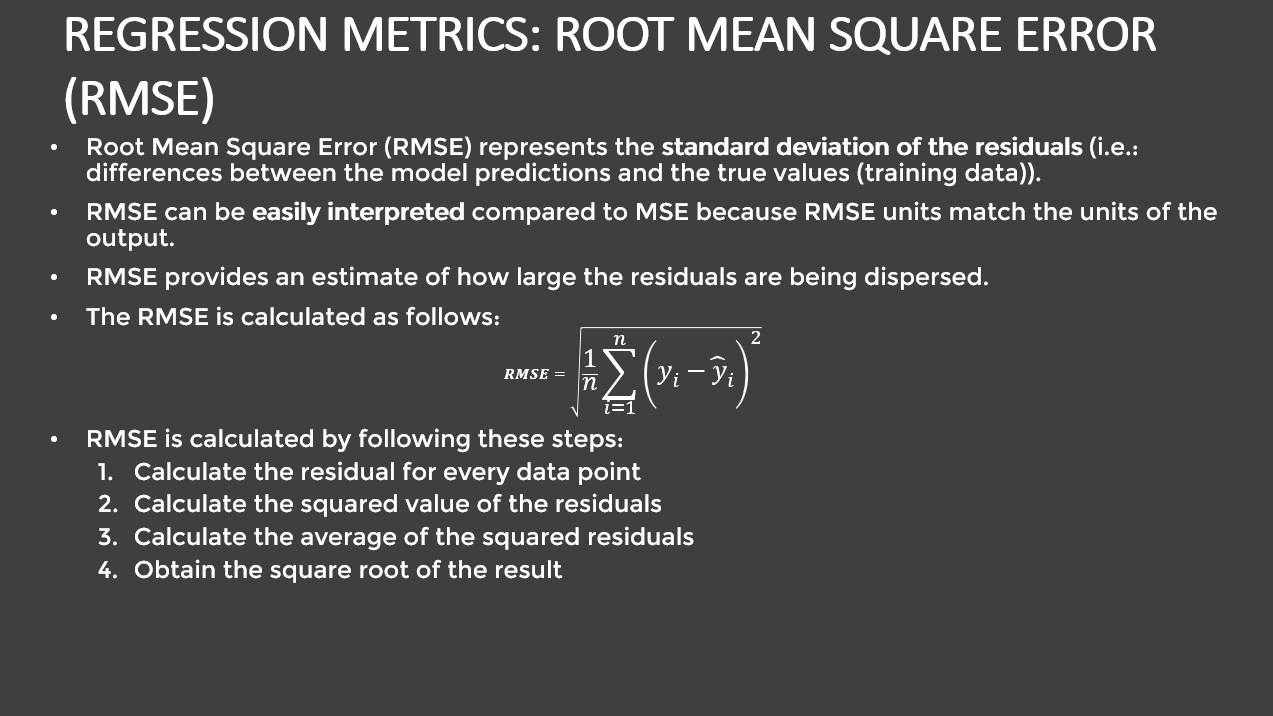

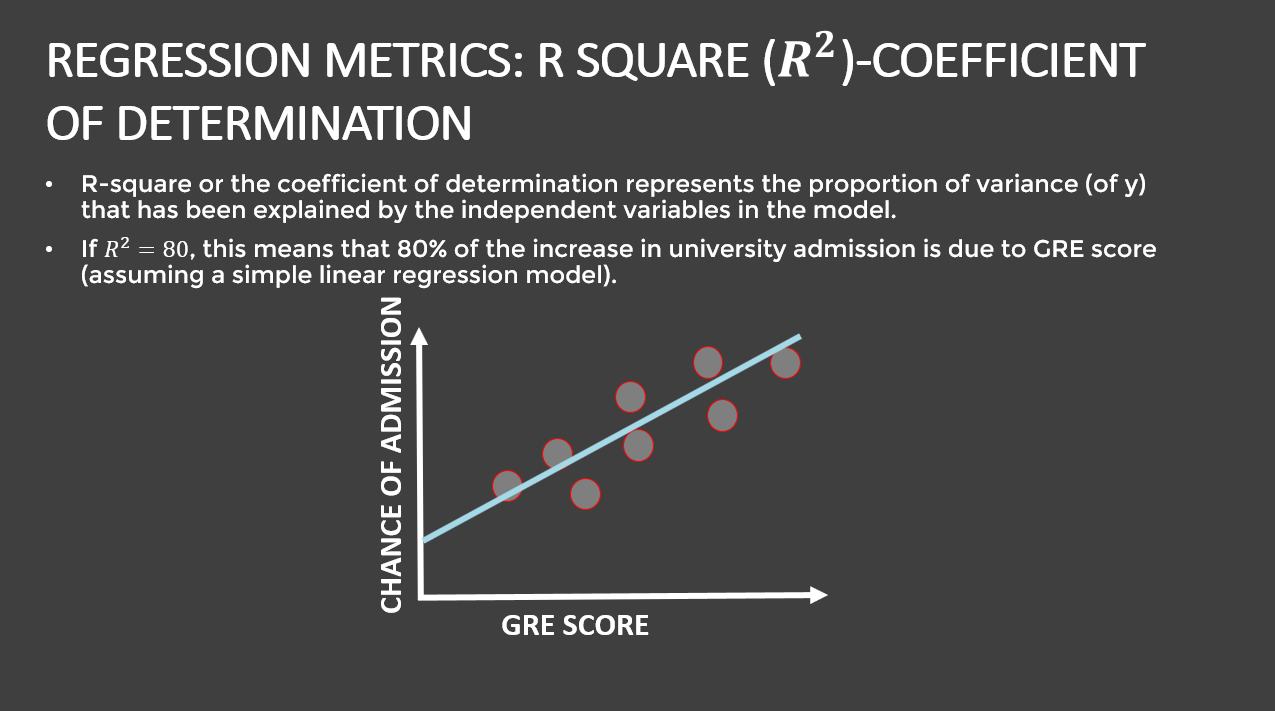

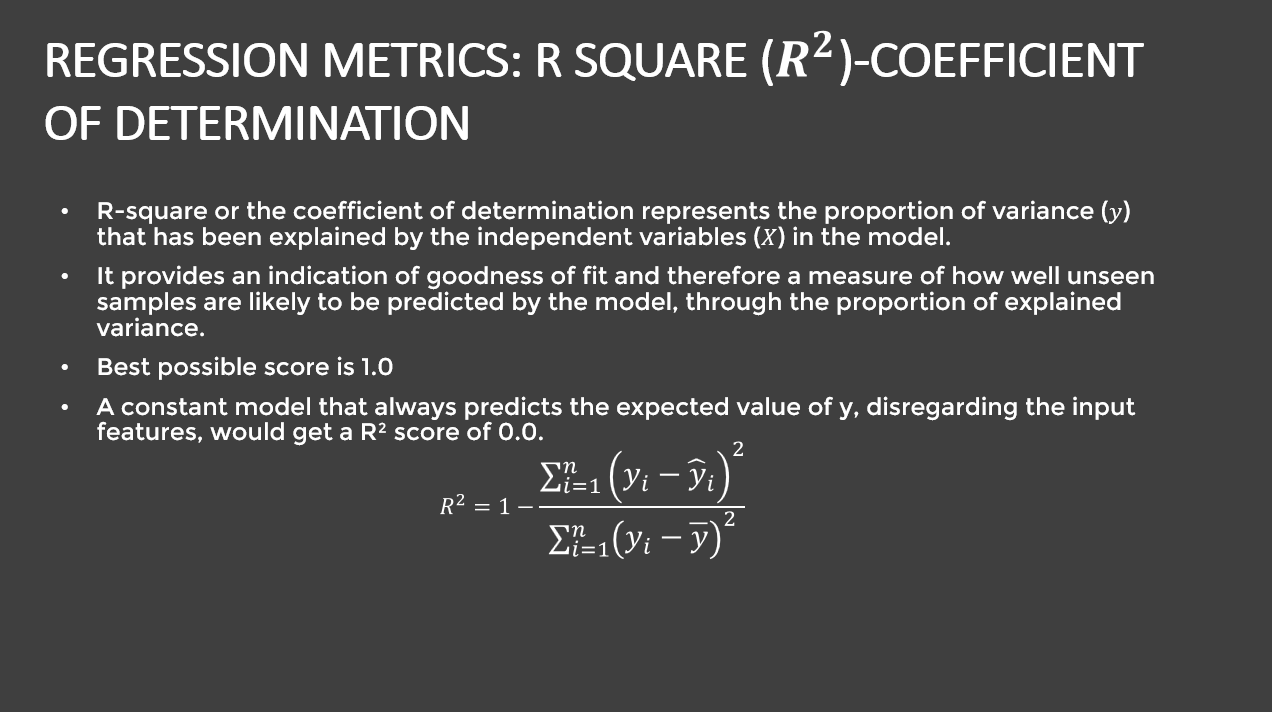

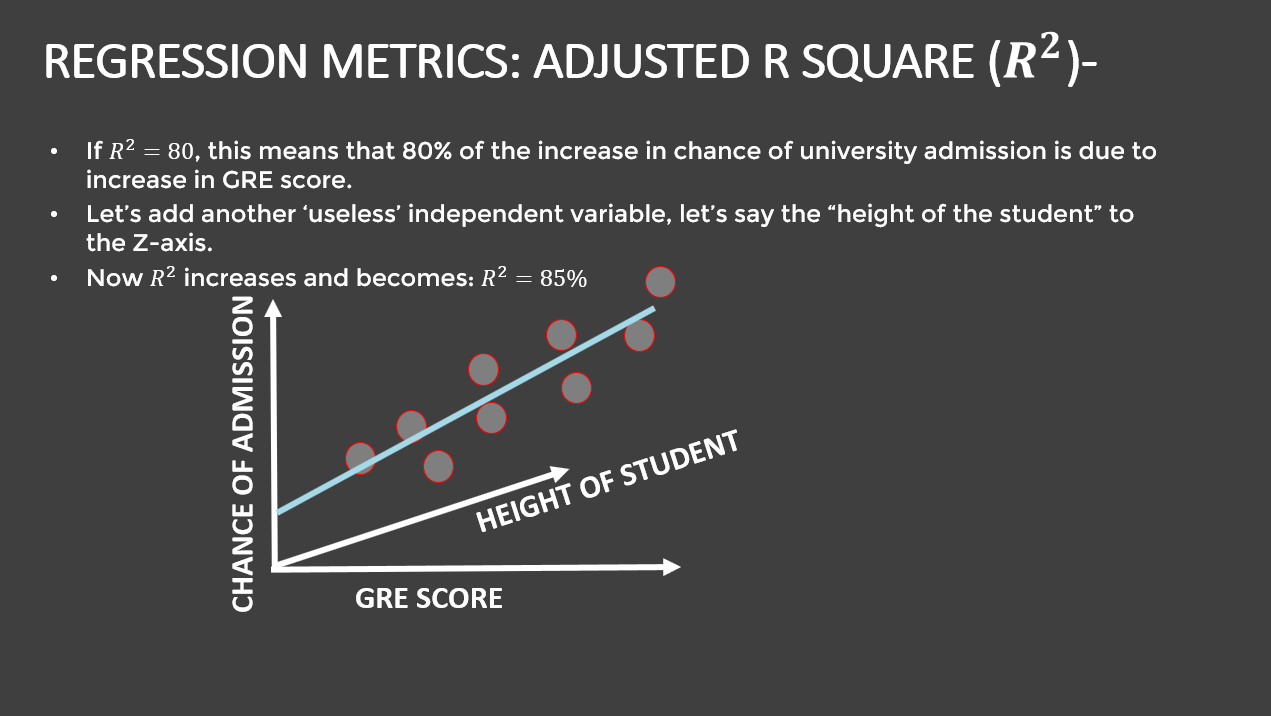

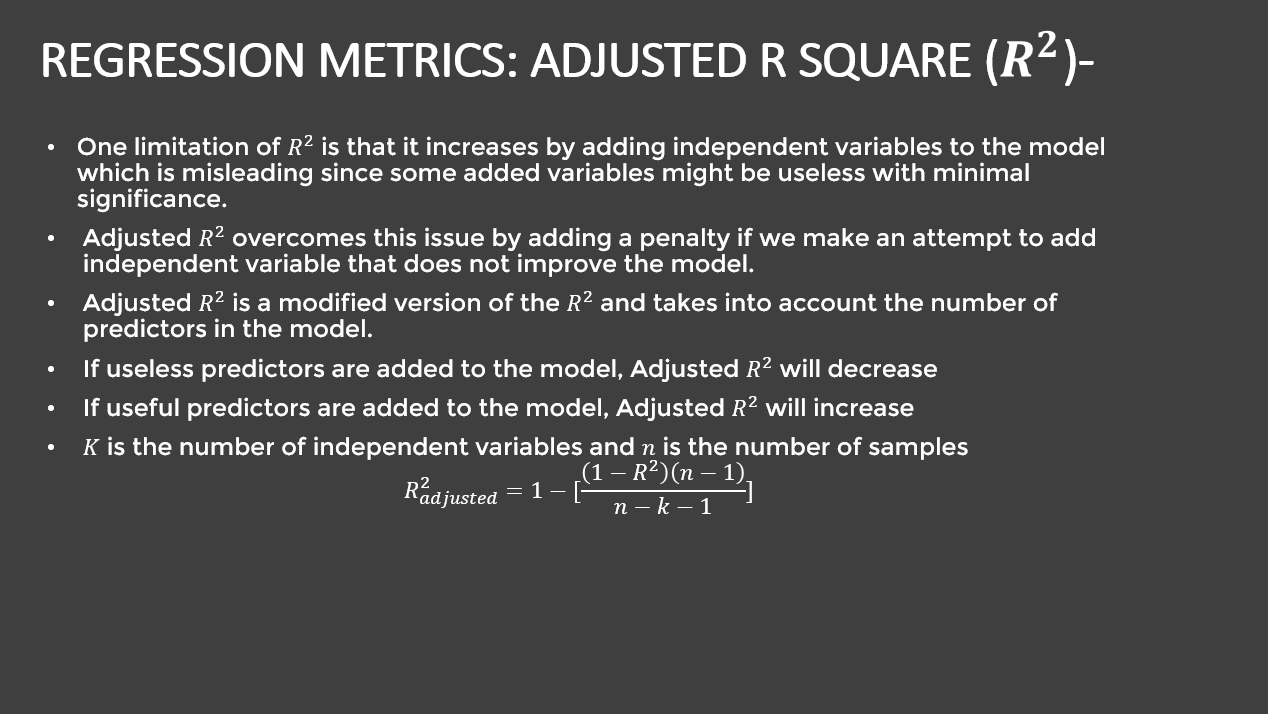

# TASK #10: CALCULATE REGRESSION MODEL KPIs

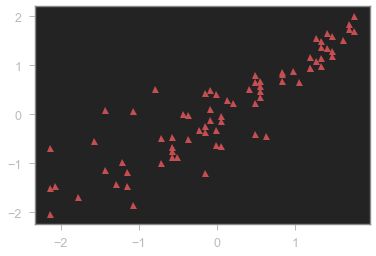

In [37]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'r')

In [38]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

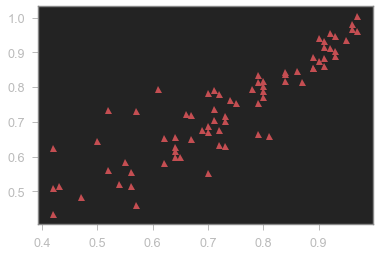

In [39]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [40]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.067 
MSE = 0.004516850457863015 
MAE = 0.046339954876022715 
R2 = 0.8005356999544703 
Adjusted R2 = 0.7796961462183701


# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

In [43]:
X = [1,2,3,4]
X = np.array(X)
X = X.reshape(-1,1)

print(X.shape)

(4, 1)
